# Исследование о закономерностях, определяющих успешность игры

**Источник** - открытые источники

**Задача** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Содержание:

1. Изучение данных

2. Предобработка данных

3. Исследовательский анализ данных:

 3.1 Сколько игр выпускалось за все периоды
 
 3.2 Как менялись продажи по платформам
 
 3.3 График "ящик с усами" по глобальным продажам игр в разбивке по платформам
 
 3.4 Влияние на продажи отзывов
 
 3.5 Распределение игр по жанрам
 
 3.6 Распределение игр по платформам
 
4. Портрет пользователей каждого региона
 4.1 Пользователь Северной Америки
 
 4.2 Пользоатель Японии
 
 4.3 Пользователи других стран
 
5. Проверка гипотез

6. Выводы и рекомендации

## Шаг 1. Изучение данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим, что есть пропуски в данных, названия столбцов необходимо привести к нижнему регистру.

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Проверим на выбросы данных столбец дат:

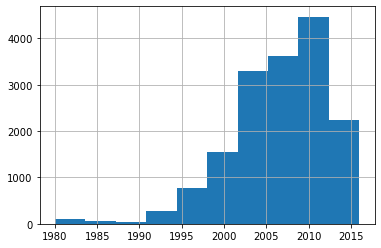

In [5]:
games['Year_of_Release'].hist()
None

Видим, что до 1993 - игр было незначительно мало - их можно исключить.

In [6]:
# удаляем
games = games[(games['Year_of_Release']>1992)]
# проверяем
games['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
Name: Year_of_Release, dtype: int64

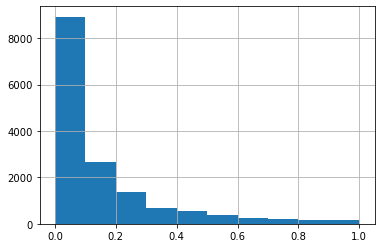

In [7]:
games['NA_sales'].hist(bins=10, range=(0,1))
None

In [8]:
games.query('NA_sales==0').head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
563,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.0,0.00,2.68,0.00,NaN,NaN,NaN
674,Dragon Warrior Monsters,GB,1998.0,Role-Playing,0.0,0.00,2.34,0.01,NaN,NaN,NaN
694,Yokai Watch Busters,3DS,2015.0,Action,0.0,0.00,2.29,0.00,NaN,NaN,NaN
752,Yu-Gi-Oh: Duel Monsters 4,GB,2000.0,Role-Playing,0.0,0.00,2.17,0.01,NaN,NaN,NaN
794,Derby Stallion,PS,1997.0,Sports,0.0,0.00,1.96,0.14,NaN,NaN,NaN


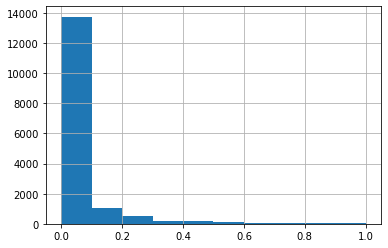

In [9]:
games['JP_sales'].hist(bins=10, range=(0,1))
None

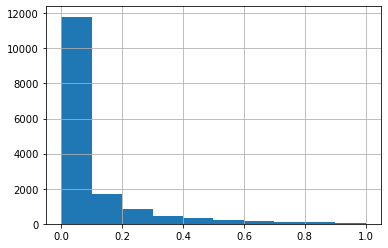

In [10]:
games['EU_sales'].hist(bins=10, range=(0,1))
None

In [11]:
(games.query('NA_sales==0')).head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
563,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.0,0.00,2.68,0.00,NaN,NaN,NaN
674,Dragon Warrior Monsters,GB,1998.0,Role-Playing,0.0,0.00,2.34,0.01,NaN,NaN,NaN
694,Yokai Watch Busters,3DS,2015.0,Action,0.0,0.00,2.29,0.00,NaN,NaN,NaN
752,Yu-Gi-Oh: Duel Monsters 4,GB,2000.0,Role-Playing,0.0,0.00,2.17,0.01,NaN,NaN,NaN
794,Derby Stallion,PS,1997.0,Sports,0.0,0.00,1.96,0.14,NaN,NaN,NaN


Мы можем сделать вывод о том, что есть игры под определенным уникальным названием, выпущенные только для Японии, или только для Европы и т.д. в одном году, и выпущенные в других странах в другом году или с другими названиями, потому такие пики на 0.

Проверим на выбросы данных жанры игр:

In [12]:
games['Genre'].value_counts()

Action          3232
Sports          2269
Misc            1710
Role-Playing    1460
Adventure       1285
Shooter         1260
Racing          1213
Simulation       850
Platform         830
Fighting         825
Strategy         666
Puzzle           539
Name: Genre, dtype: int64

Выбросов нет, неявных дубликатов тоже.

In [13]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000,7980.000000
mean,2006.865312,0.250011,0.145327,0.069984,0.047816,68.994236
std,5.200867,0.715855,0.507503,0.283918,0.189034,13.920962
min,1993.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.230000,0.110000,0.030000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Year_of_Release - достаточно будет перевести в целочисленный тип

ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Посмотрим- сколько пропусков в таких категориях.

In [14]:
# посмотрим сколько пропусков
(games['Rating'].isna().sum())/len(games)

0.3950808500092931

In [15]:
# пока заменим пропуски на unknown
games['Rating'] = games['Rating'].fillna(value = 'unknown')

In [16]:
games['Rating'].value_counts()

unknown    6377
E          3921
T          2903
M          1535
E10+       1392
EC            8
K-A           3
AO            1
RP            1
Name: Rating, dtype: int64

E - Подходит для всех возрастных категорий

T - Подходит для лиц старше 13 лет

M - Подходит для лиц старше 17 лет

E 10+  - Подходит для лиц старше 10 лет

EC - Для детей младшего возраста. Подходит для детей от 3 лет.

K-A - не понятно

AO - только для взрослых

RP - рейтинг ожидается

In [17]:
15/len(games)

0.0009293104516448795

Смело можем удалить рейтинги, по которым представлено слишком малое количество игр, чтобы делать по ним анализ.

In [18]:
# удаляем
games = games[(games['Rating']!= 'EC')&
              (games['Rating']!= 'K-A')&
              (games['Rating']!= 'RP')&
              (games['Rating']!= 'AO')]
# проверяем
games['Rating'].value_counts()

unknown    6377
E          3921
T          2903
M          1535
E10+       1392
Name: Rating, dtype: int64

Мы изучили общую информацию о данных,  проверили данные на аномалии и избавились от игр - до 1994 года, так как их было незначительно. В следующем шаге будем разбираться с пропусками, регистром в названиях столбцов и типами в данных.

## Шаг 2. Предобработка данных

In [19]:
# приведем названия столбцов к нижнему регистру
games.columns = [x.lower() for x in games.columns]
# приведем к нижнему регистру содержимое столбцов
games['name'] = games['name'].str.lower()
games['genre'] = games['genre'].str.lower()
games['platform'] = games['platform'].str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E


Преобразуем в целочисленное значение столбцы  с годом. Мы не будем переводить продажи в целочисленные значения, таак как счет там в миллионах и при округлении можем потерять большие значения.

games['year_of_release'] = games['year_of_release'].astype('int32')
games.info()

In [20]:
# удалим 2 пропуска в name
games.dropna(subset=['name'], inplace=True)

In [21]:
# проверим наличие нулевых оценок:
len(games.query('user_score==0'))

0

tbd - рейтинг пока не определен. заменим пока на 0 и остальные пропуски таким же значением.

In [22]:
games['user_score'] = games['user_score'].fillna(value = '0')
games.loc[games['user_score'] == 'tbd', 'user_score'] = 0
games['user_score'] = pd.to_numeric(games['user_score'])
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8149
user_score            0
rating                0
dtype: int64

In [23]:
#проверим наличие нулевых оценок:
len(games.query('critic_score==0'))

0

In [24]:
# заменим пропуски и tbd на 0
games['critic_score'] = games['critic_score'].fillna(value = 'tbd')
games.loc[games['critic_score'] == 'tbd', 'critic_score'] = 0
games['critic_score'] = pd.to_numeric(games['critic_score'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16126 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16126 non-null  object 
 1   platform         16126 non-null  object 
 2   year_of_release  16126 non-null  float64
 3   genre            16126 non-null  object 
 4   na_sales         16126 non-null  float64
 5   eu_sales         16126 non-null  float64
 6   jp_sales         16126 non-null  float64
 7   other_sales      16126 non-null  float64
 8   critic_score     16126 non-null  float64
 9   user_score       16126 non-null  float64
 10  rating           16126 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Разберемся с дублями. Проверим на явные дубликаты.

In [25]:
games.duplicated().sum()

0

Проверим на неявные дубликаты.

In [26]:
platform_unuque = games['platform'].unique()
platform_unuque.sort()
platform_unuque

array(['3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'n64', 'nes',
       'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp', 'psv', 'sat',
       'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360', 'xb', 'xone'],
      dtype=object)

Мы видим, что есть 3 основные платформы - playstation, xbox, nintendo, pc. Есть различия в поколениях и портативная приставка или нет. Сделаем категоризацию данных по рейтингу.

In [27]:
# категоризация по рейтингу
def rating_category(rating):
    if rating =='E':
        return 'для всех возрастов'
    if rating == 'T':
        return 'от 13'
    if rating =='M':
        return 'от 17'
    if rating =='E 10+':
        return 'от 10'
    if rating =='EC':
        return 'от 3'
    else:
        return 'unknown'      
games['rating_category'] = games['rating'].apply(rating_category)
games['rating_category'].value_counts()

unknown               7767
для всех возрастов    3921
от 13                 2903
от 17                 1535
Name: rating_category, dtype: int64

In [28]:
games.pivot_table(index=['genre'], columns = 'rating_category', values= 'rating',aggfunc='count')

rating_category,unknown,для всех возрастов,от 13,от 17
genre,,,,
action,1554.0,410.0,670.0,596.0
adventure,913.0,159.0,113.0,98.0
fighting,412.0,8.0,357.0,48.0
misc,1014.0,449.0,228.0,13.0
platform,410.0,354.0,63.0,3.0
puzzle,245.0,284.0,10.0,NaN
racing,452.0,576.0,167.0,18.0
role-playing,801.0,83.0,415.0,161.0
shooter,321.0,47.0,340.0,552.0


Пропуски есть в каждом жанре, нет жанров, в котором было бы определение- для всех возрастов и все, потому оставим заполнение пропусков unknown. Добавим отдельный столбец с суммарными продажами по всем регионам:

In [29]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_category,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,для всех возрастов,82.54
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,для всех возрастов,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,для всех возрастов,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,unknown,31.38
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,для всех возрастов,29.80


In [30]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
rating_category    0
total_sales        0
dtype: int64

Мы проверили данные на явные и неявные дубликаты, привели названия стодбцов к нижнему регистру, избавились от пропусков -  в данных "категоризация по рейтингу' заменили пропуски на unknown, так как не нашли взаимосвязи, что определенному жанру соответствует определенный рейтинг. tbd  - рейтинг пока не определен-заменили на 0, чтобы затем смогли определить есть ли взаимосвязь между продажами и оценками пользователей и юзеров. Обнаружили общее в продающихся игровых платформах - основные платформы - playstation, xbox, nintendo, pc. Есть различия в поколениях и том - портативная приставка или нет.

## Шаг 3. Проведите исследовательский анализ данных

### Изучим сколько игр выпускалось за все периоды.

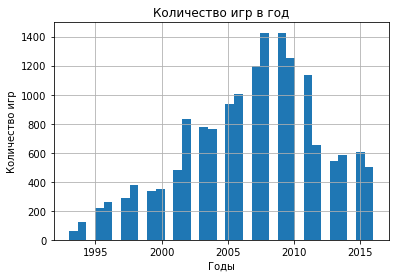

In [31]:
games['year_of_release'].hist(bins=35)
plt.title('Количество игр в год')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
None

Изучим количество общих продаж за все периоды:

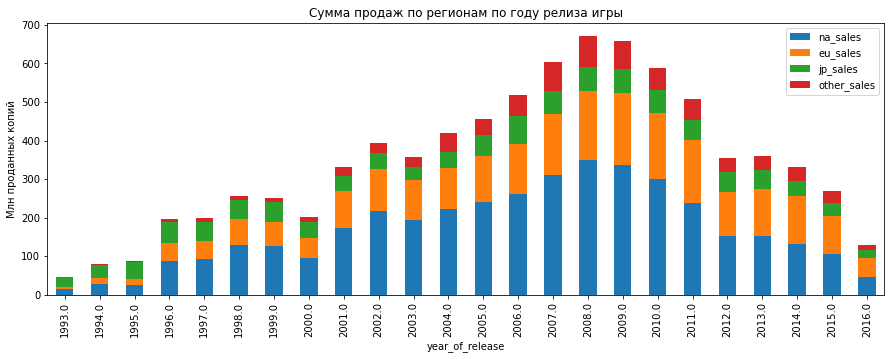

In [32]:
fig, ax = plt.subplots()

(games
 .groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .agg('sum')
 .plot(kind='bar',
       stacked=True, figsize=(15, 5),
       ax=ax))

ax.set_title('Сумма продаж по регионам по году релиза игры')
ax.set_ylabel('Млн проданных копий')
plt.show()

Мы видим, что до 2008 года количество игр  и продаж росло. 

2008 является пиком и по количеству выпущенных игр и по выручке за них (лигично, что цикл продаж у игр короткий и основные продажи осуществляются в тот же год, что была выпущена игра.  

После 2008 количество игр стало падать. Это связано с кризисом, случившимся в 2008 и затронувшим всю игровую индустрию.
Так же мы видим, что распределение релиза и продаж игр по регионам в целом стабильно, только в 2016 продажи других стран и Японии выглядят значительно меньше, но это может быть связано с тем, что данные за 2016 год еще не подгрузились.

### Посмотрим -как менялись продажи по платформам:

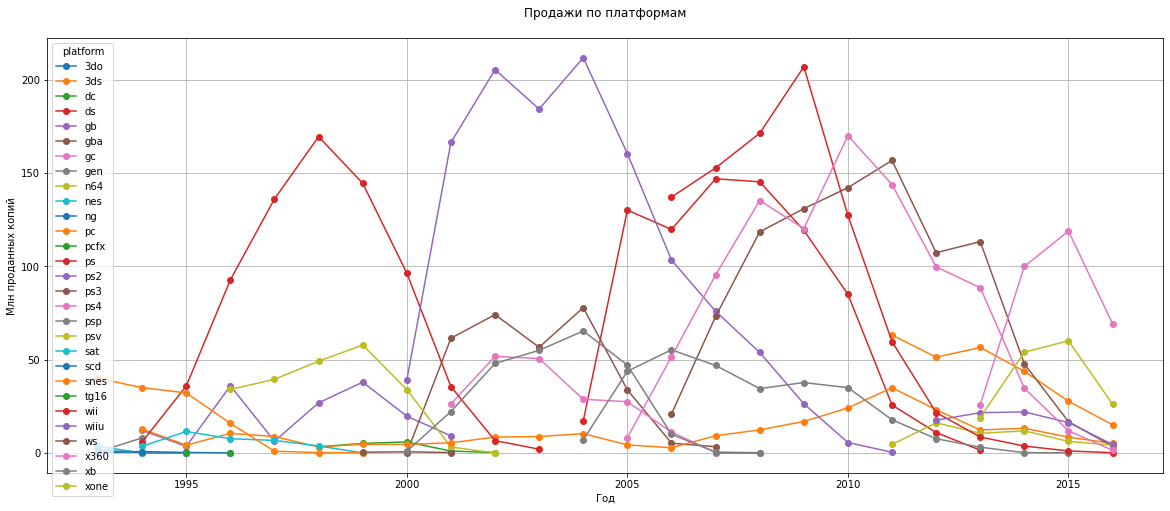

In [33]:
(games
 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(20,8),  style = 'o-',grid=True)
)
plt.title('Продажи по платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Млн проданных копий');

Можем сказать, что средний цикл продаж по платформе - около 10 лет. Проверим на всякий случай еще раз.

Выберем платформы с наибольшими суммарными продажами:

In [34]:
games.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by = 'total_sales',ascending=False).head(10)

,total_sales
platform,
ps2,1233.32
x360,961.24
ps3,931.34
wii,890.52
ds,802.11
ps,725.67
ps4,314.14
gba,312.88
psp,289.53


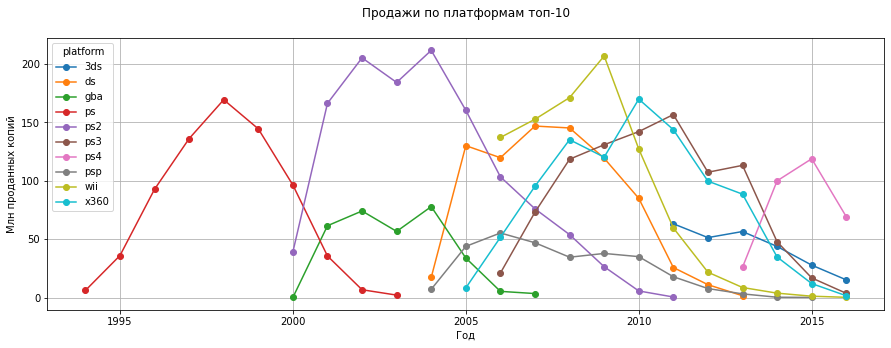

In [35]:
top10 = games.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by = 'total_sales',ascending=False).head(10).index
# сделаем срез данных по топу и построим график
games.query("platform in @top10").pivot_table(index='platform', columns='year_of_release', 
values='total_sales', aggfunc='sum').T.plot(kind='line', figsize=(15,5), style = 'o-',grid=True)
plt.title('Продажи по платформам топ-10'+ "\n")
plt.xlabel('Год')
plt.ylabel('Млн проданных копий');


Видим, чт из новых платформ- появилась ps4. Для того, чтобы данные были актуальны, нам достаточно взять срез  за 2 года, не включая 2016, так как данные по нему-неполные. Посмотрим какие платформы существуют в этот период.

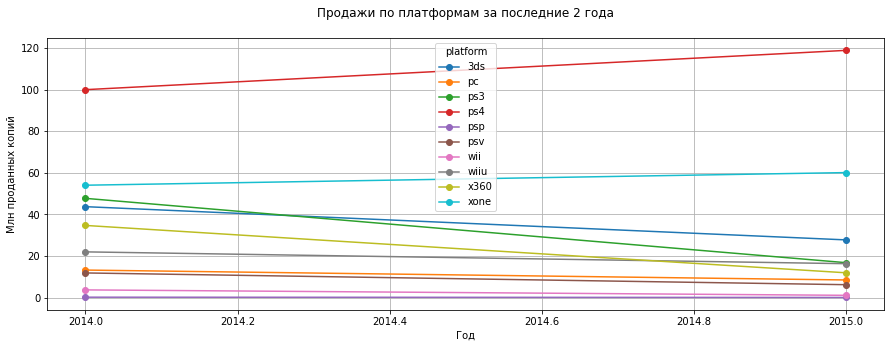

In [36]:
games.query('2014<=year_of_release<2016').pivot_table(index='platform', 
columns='year_of_release', values='total_sales', aggfunc='sum').T.plot(kind='line', figsize=(15,5),  style = 'o-',grid=True)
plt.title('Продажи по платформам за последние 2 года'+ "\n")
plt.xlabel('Год')
plt.ylabel('Млн проданных копий');

У нас есть 10 продающихся платформ, по которым мы можем делать дальнейший анализ.
PS4, xone -набирают свою популярность,  ps3, 3ds и x360 идут на спад, остальные идут относительно ровно.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [37]:
games_two_years = games.query('2014<=year_of_release<2016')
games_two_years.groupby('platform')['total_sales'].sum().head()

platform
3ds     71.54
pc      21.80
ps3     64.58
ps4    218.90
psp      0.36
Name: total_sales, dtype: float64

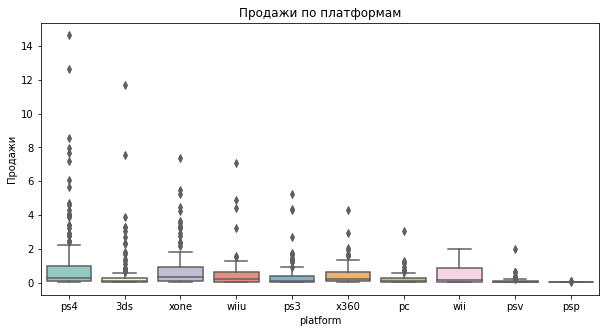

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='platform', y='total_sales', data=games_two_years, palette='Set3')
plt.ylabel('Продажи')
plt.title('Продажи по платформам')
None

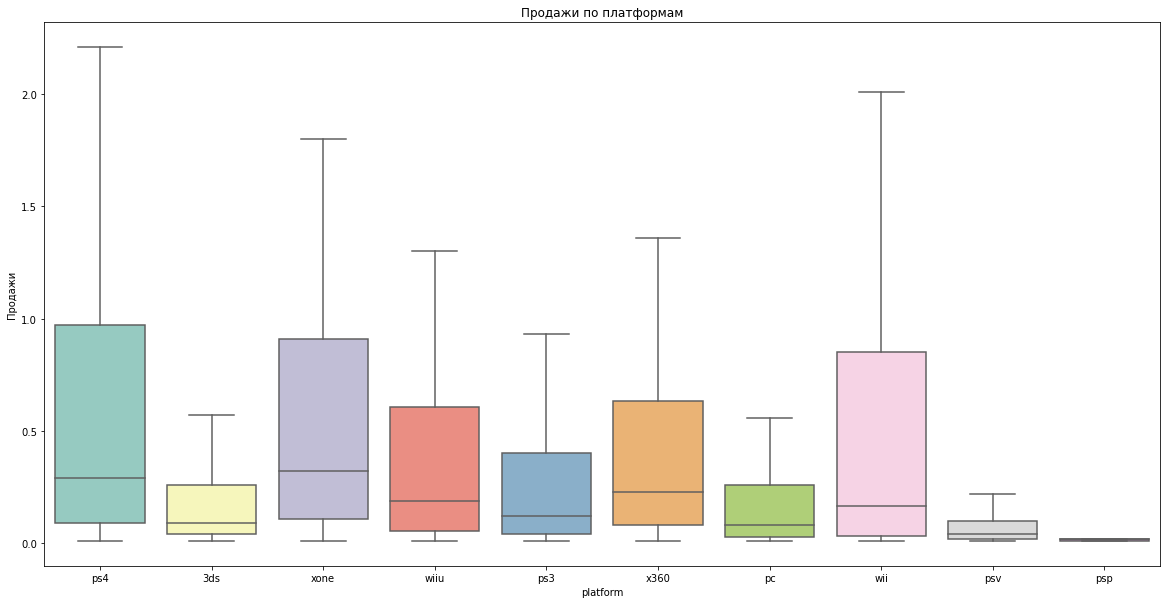

In [39]:
# строим боксплот без выбросов
plt.figure(figsize=(20, 10))
sns.boxplot(x='platform', y='total_sales', data=games_two_years, palette='Set3', showfliers=False)
plt.ylabel('Продажи')
plt.title('Продажи по платформам')
None

Медианные значения продаж расположены очень низко – мы можем сделать вывод о том, что на всех платформах выходит много игр с относительно небольшими продажами. При этом почти у всех платформ есть игры- бестселлеры, продажи которых могут многократно превышать обычные значения.

<div class="alert alert-anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов
        
Оба вида важны, т.к. выбросы — это наши звезды, которые приносят максимум выручки

### Изучим  -  как влияют на продажи отзывы пользователей и критиков. 

Самая популярная платформа  - это PS4. Построим матрицу диаграмм рассеяния и посчитаем корреляцию между отзывами и продажами.

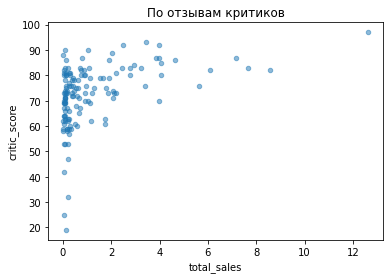

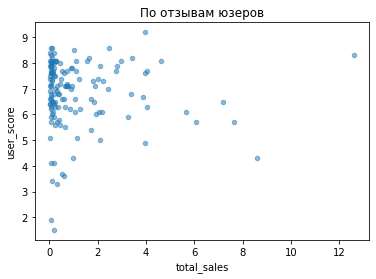

In [40]:
games_ps4 = games_two_years.query('platform=="ps4" & critic_score!=0 & user_score!=0')
games_ps4  = games_ps4[['total_sales','critic_score', 'user_score']]
games_ps4.plot(x='total_sales', y='critic_score', kind='scatter',alpha = 0.5)
plt.title('По отзывам критиков')
None
games_ps4.plot(x='total_sales', y='user_score', kind='scatter',alpha = 0.5)
plt.title('По отзывам юзеров')
None

In [41]:
games_ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.427817,-0.003283
critic_score,0.427817,1.000000,0.602514
user_score,-0.003283,0.602514,1.000000


Оценка критиков и продажи имеют корреляцию 0.4  - слабая корреляция

Оценка юзеров и продажи - имеют корреляцию - 0.03 - очень слабая отрицательня корреляция

Это говорит о том, что между оценками и продажами практически нет зависимости. Возможно это связано с тем, что все сначала покупают игру после выхода, а потом уже появляются оценки на нее.

Проверим корреляцию на xone:

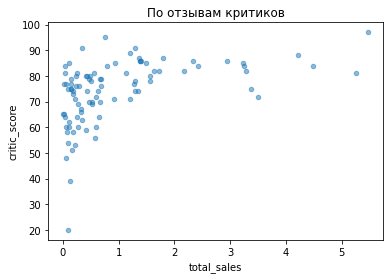

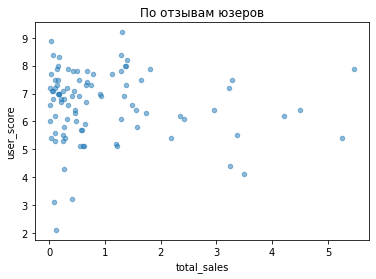

In [42]:
games_xone = games_two_years.query('platform=="xone" & critic_score!=0 & user_score!=0')
games_xone  = games_xone[['total_sales','critic_score', 'user_score']]
games_xone.plot(x='total_sales', y='critic_score', kind='scatter',alpha = 0.5)
plt.title('По отзывам критиков')
None
games_xone.plot(x='total_sales', y='user_score', kind='scatter',alpha = 0.5)
plt.title('По отзывам юзеров')
None

In [43]:
games_xone.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.466241,-0.062044
critic_score,0.466241,1.000000,0.453434
user_score,-0.062044,0.453434,1.000000


Оценка критиков и продажи имеют корреляцию 0.5  - слабая корреляция.

Оценка юзеров и продажи - имеют корреляцию - 0.06 - очень слабая отрицательня корреляция.

Проверим корреляцию на ps3:

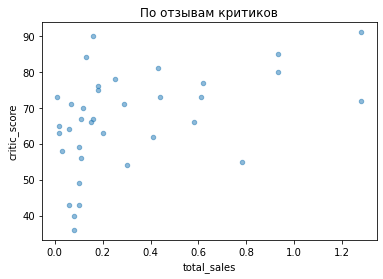

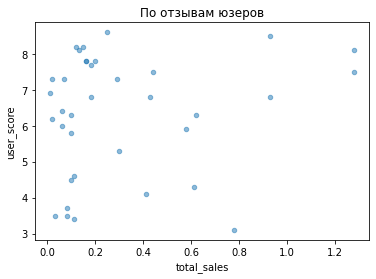

In [44]:
games_ps3 = games_two_years.query('platform=="ps3" & critic_score!=0 & user_score!=0')
games_ps3  = games_ps3[['total_sales','critic_score', 'user_score']]
games_ps3.plot(x='total_sales', y='critic_score', kind='scatter',alpha = 0.5)
plt.title('По отзывам критиков')
None
games_ps3.plot(x='total_sales', y='user_score', kind='scatter',alpha = 0.5)
plt.title('По отзывам юзеров')
None

In [45]:
games_ps3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,0.156595
critic_score,0.446575,1.000000,0.693445
user_score,0.156595,0.693445,1.000000


Оценка критиков и продажи имеют корреляцию 0.4 - слабая корреляция.

Оценка юзеров и продажи - имеют корреляцию - 0.2 - очень слабая отрицательня корреляция.

Мы проверили корреляцию на трех платформах и убедились, что оценки критиков и юзеров не влияют на продажи.

### Изучим распределение игр по жанрам

In [46]:
games_two_years.pivot_table(index=['genre'], values= ['total_sales'], aggfunc='sum').sort_values(by = 'total_sales',ascending=False).head()

,total_sales
genre,
action,169.25
shooter,132.72
sports,85.99
role-playing,83.26
misc,34.95


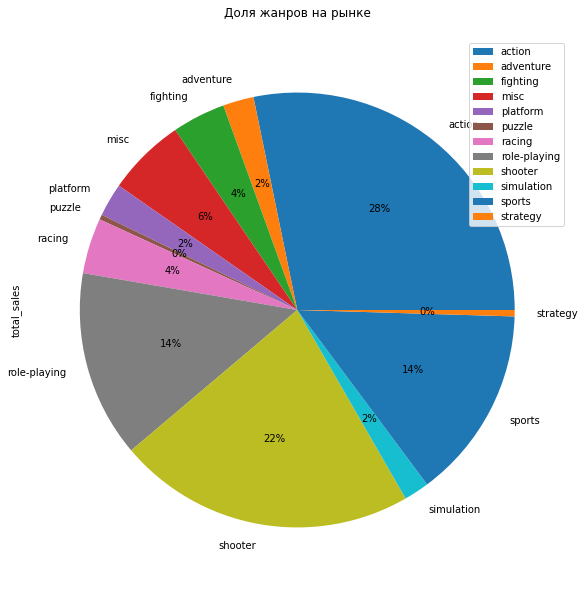

In [47]:
games_two_years.groupby(['genre']).sum().plot(kind='pie', y='total_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Доля жанров на рынке'+ "\n")
None

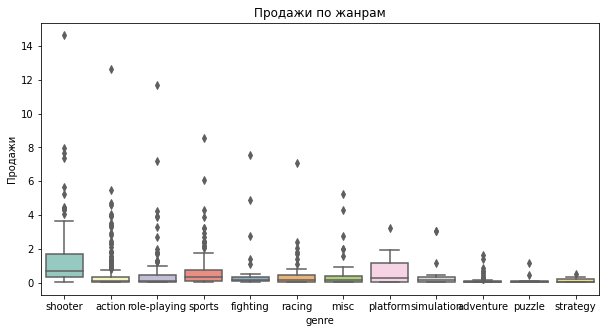

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='genre', y='total_sales', data=games_two_years, palette='Set3')
plt.ylabel('Продажи')
plt.title('Продажи по жанрам')
None

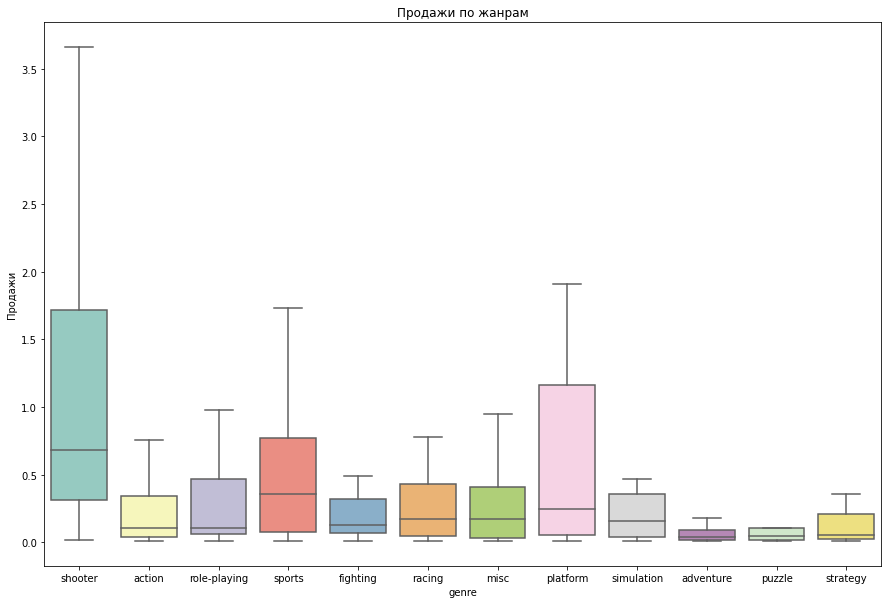

In [49]:
# строим боксплот без выбросов
plt.figure(figsize=(15, 10))
sns.boxplot(x='genre', y='total_sales', data=games_two_years, palette='Set3', showfliers=False)
plt.ylabel('Продажи')
plt.title('Продажи по жанрам')
None

Практически у каждого жанра есть выбросы- игры-"звезды".
Топ-5 жанров, если учитывать игры-"звезды": экшен, шутер, сортивные, ролевки и игры смешанных жанров.

Топ-5 жанров без выбросов с самыми высоким медианными продажами и более длтнным рядом успешно продающихся игр- шутеры, платформеры, спортивные, гонки и игры смешанных жанров.

Выделяются жанры с самыми плохими продажами - хуже всего продаются паззлы, приключения и стратегии(возможно потому, что на рынке представлено огромное количество игр в этом жанре бесплатно).

### Изучим распределение игр по платформам

In [50]:
games_two_years.pivot_table(index=['platform'], values= ['total_sales'], aggfunc='sum').sort_values(by = 'total_sales',ascending=False).head()

,total_sales
platform,
ps4,218.90
xone,114.21
3ds,71.54
ps3,64.58
x360,46.70


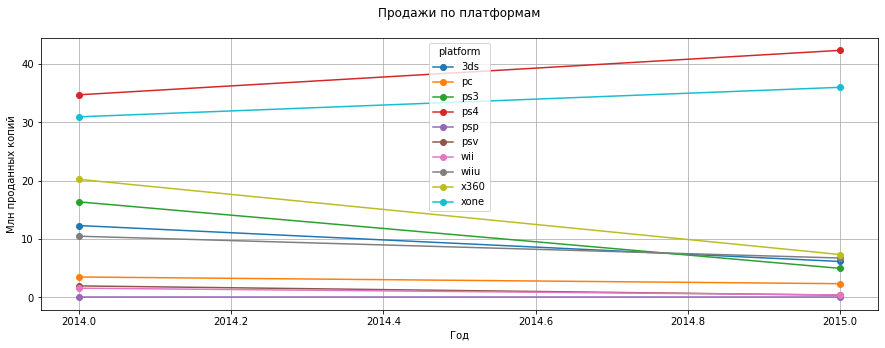

In [51]:
games_two_years.pivot_table(index='platform', columns='year_of_release', 
values='na_sales', aggfunc='sum').T.plot(kind='line', figsize=(15,5), style = 'o-',grid=True)
plt.title('Продажи по платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Млн проданных копий');

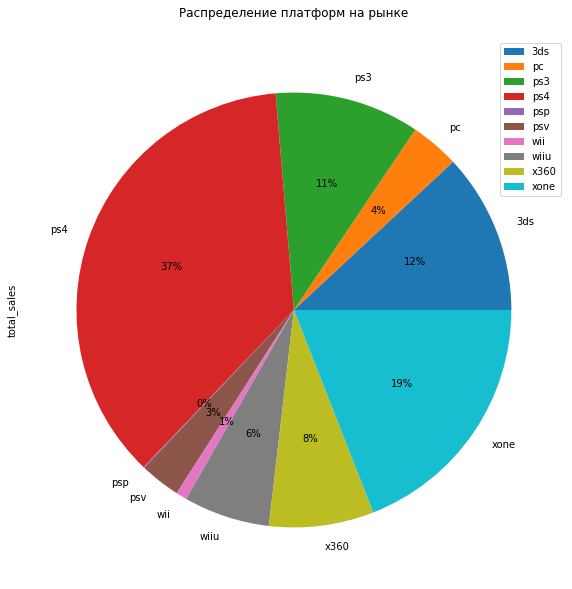

In [52]:
games_two_years.groupby(['platform']).sum().plot(kind='pie', y='total_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Распределение платформ на рынке'+ "\n")
None

Есть 5 самых популярных платформ: PS4, PS3, X360, 3DS, XOne. Их них - PS4 и  Xone относительно новые для рынка, их продажи набирают обороты. Интересно, что 3DS-это портативная платформа, в отличае от всех остальных.

## Шаг 4. Составьте портрет пользователя каждого региона

### Изучим пользователя Северной Америки

Посмотрим сколько уникальных игр продано в Северной Америке за последние 5 лет:

In [53]:
na_games = games_two_years.query('na_sales!=0')
na = len(na_games)
na

699

#### Посмотрим на самые популярные платформы (Топ-5):

In [54]:
na_games.pivot_table(index=['platform'], values= ['na_sales'], aggfunc='sum').sort_values(by = 'na_sales',ascending=False).head()

,na_sales
platform,
ps4,77.12
xone,67.00
x360,27.61
ps3,21.38
3ds,18.50


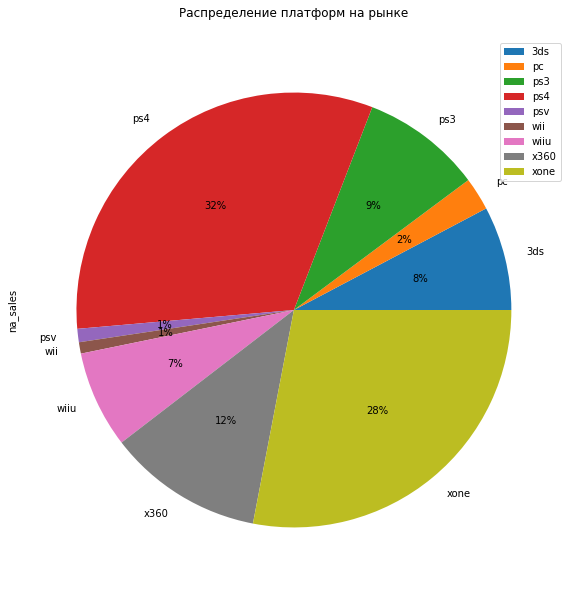

In [55]:
na_games.groupby(['platform']).sum().plot(kind='pie', y='na_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Распределение платформ на рынке'+ "\n")
None

В Северной Америке есть 5 самых популярных платформ, в отличае от общего топа, здесь на первом месте  -  X360, а на последнем портативная 3DS. В целом в топе все те же игры. 
Производитель  Х360 - американская компания Microsoft, вероятно с этим связана популярность Х360 именно в Северной Америке.

#### Посмотрим на самые популярные жанры (Топ-5).

In [56]:
na_games.pivot_table(index=['genre'], values= ['na_sales'], aggfunc='sum').sort_values(by = 'na_sales',ascending=False).head()

,na_sales
genre,
action,63.24
shooter,62.78
sports,38.59
role-playing,27.58
misc,14.29


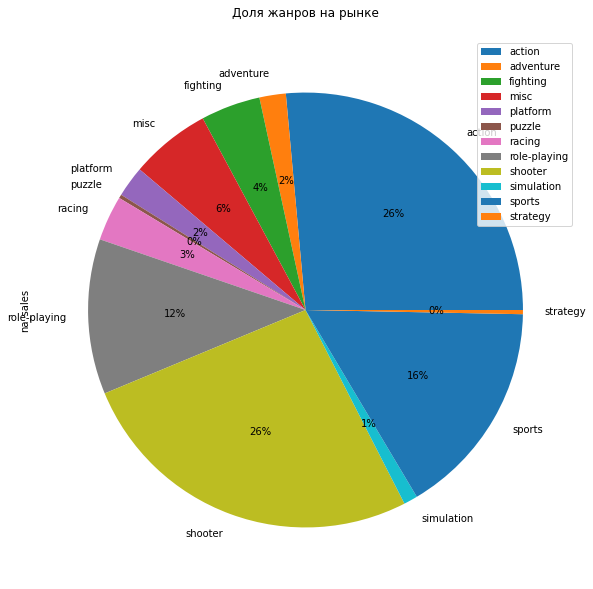

In [57]:
na_games.groupby(['genre']).sum().plot(kind='pie', y='na_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Доля жанров на рынке'+ "\n")
None

Топ-5 в Северной Aмерике не отличается от Топа-5 по всей базе.

### Изучим пользователя Европы

Посмотрим сколько уникальных игр продано в Европе за последние 5 лет:

In [58]:
eu_games = games_two_years.query('eu_sales!=0')
eu = len(eu_games)
eu

784

#### Посмотрим на самые популярные платформы (Топ-5):

In [59]:
eu_games.pivot_table(index=['platform'], values= ['eu_sales'], aggfunc='sum').sort_values(by = 'eu_sales',ascending=False).head()

,eu_sales
platform,
ps4,98.26
xone,36.62
ps3,24.28
x360,14.78
pc,14.44


Тут на первом месте PS4, как в общей базe, на последнем месте появился pc, а в самом топе все те же платформы.

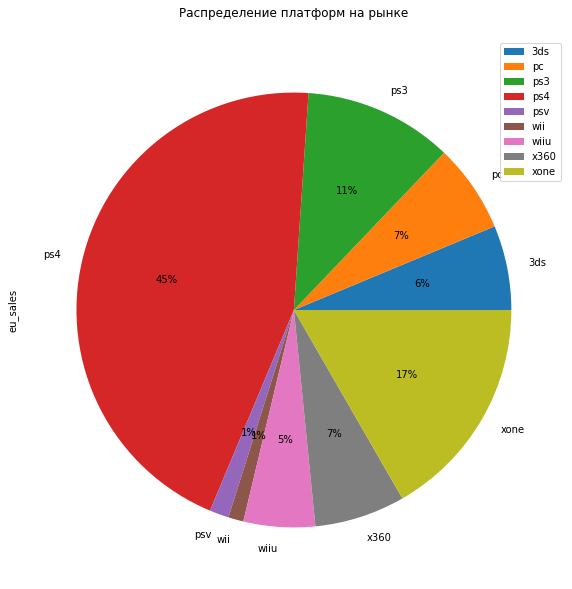

In [60]:
eu_games.groupby(['platform']).sum().plot(kind='pie', y='eu_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Распределение платформ на рынке'+ "\n")
None

#### Посмотрим на самые популярные жанры (Топ-5).

In [61]:
eu_games.pivot_table(index=['genre'], values= ['eu_sales'], aggfunc='sum').sort_values(by = 'eu_sales',ascending=False).head()

,eu_sales
genre,
action,64.00
shooter,49.62
sports,33.72
role-playing,23.89
racing,12.36


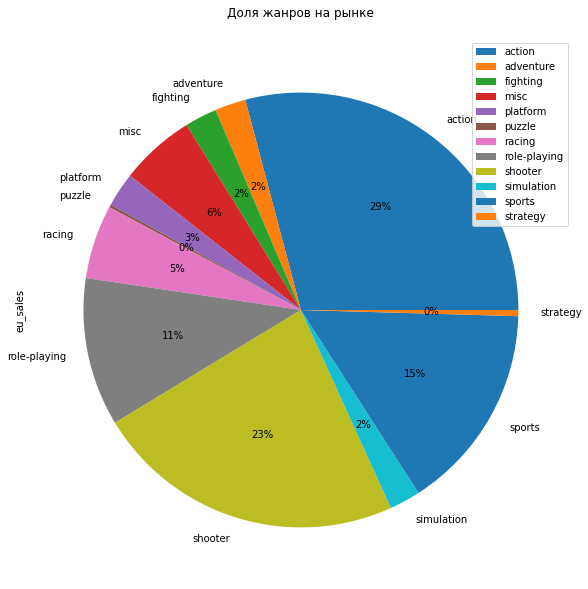

In [62]:
na_games.groupby(['genre']).sum().plot(kind='pie', y='eu_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Доля жанров на рынке'+ "\n")
None

В топе жанров здесь на местр игр смешанных жанров в топ попали гонки.Акшен и шутер по-прежнему занимают первые места.

### Изучим пользователя Японии

Посмотрим сколько уникальных игр продано в Японии за последние 5 лет:

In [63]:
jp_games = games_two_years.query('jp_sales!=0')
jp=len(jp_games)
jp

637

#### Посмотрим на самые популярные платформы (Топ-5):

In [64]:
jp_games.pivot_table(index=['platform'], values= ['jp_sales'], aggfunc='sum').sort_values(by = 'jp_sales',ascending=False).head()

,jp_sales
platform,
3ds,36.21
psv,10.98
ps3,9.92
ps4,9.28
wiiu,6.64


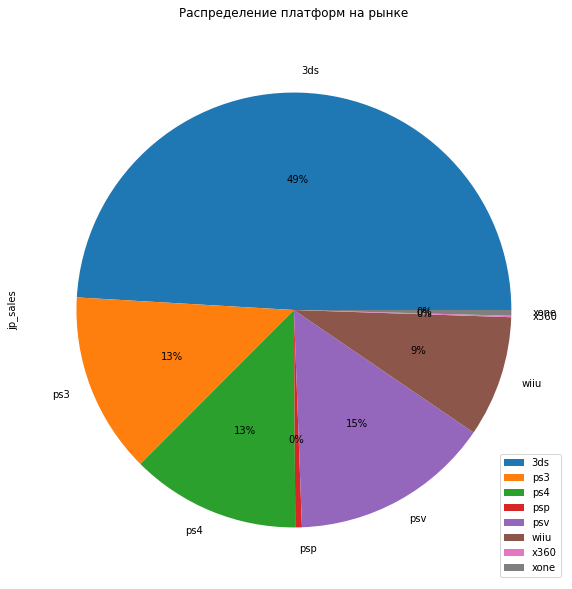

In [65]:
jp_games.groupby(['platform']).sum().plot(kind='pie', y='jp_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Распределение платформ на рынке'+ "\n")
None

#### Посмотрим на самые популярные жанры (Топ-5).

In [66]:
jp_games.pivot_table(index=['genre'], values= ['jp_sales'], aggfunc='sum').sort_values(by = 'jp_sales',ascending=False).head()

,jp_sales
genre,
role-playing,24.55
action,22.51
fighting,5.62
misc,4.57
shooter,3.81


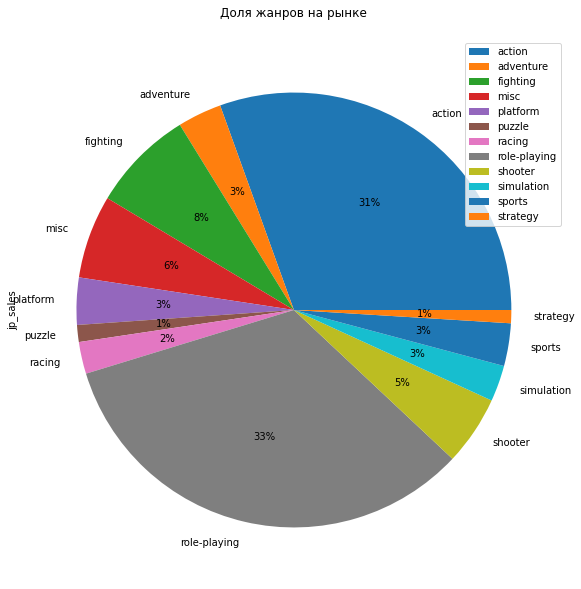

In [67]:
jp_games.groupby(['genre']).sum().plot(kind='pie', y='jp_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Доля жанров на рынке'+ "\n")
None

Япония всегда отличается от остального рынка. Мы видим здесь совершенно иную картину - с огромным отрывом в 50% лидирующая платформа здесь - портативная 3DS. Кроме того, в топ попали портативные PSV(playstation) и WiiU(Nintendo).
Это можно объяснить любовью японцев к мобильным играм и абсолютной любовбю к своему национальному продукту- Nintendo.
Жанры игр здесь отличаются, так как в топе - игры более подходящие для портативных приставок - ролевые вышли на первое место, сместив экшен на второе, в топе появились симуляторы и платформеры.

### Изучим пользователя других стран

Посмотрим сколько уникальных игр продано в других странах за последние 5 лет:

In [68]:
other_games = games_two_years.query('other_sales!=0')
ot = len(other_games)
ot

697

#### Посмотрим на самые популярные платформы (Топ-5):

In [69]:
other_games.pivot_table(index=['platform'], values= ['other_sales'], aggfunc='sum').sort_values(by = 'other_sales',ascending=False).head()

,other_sales
platform,
ps4,34.24
xone,10.28
ps3,9.00
x360,4.23
3ds,3.04


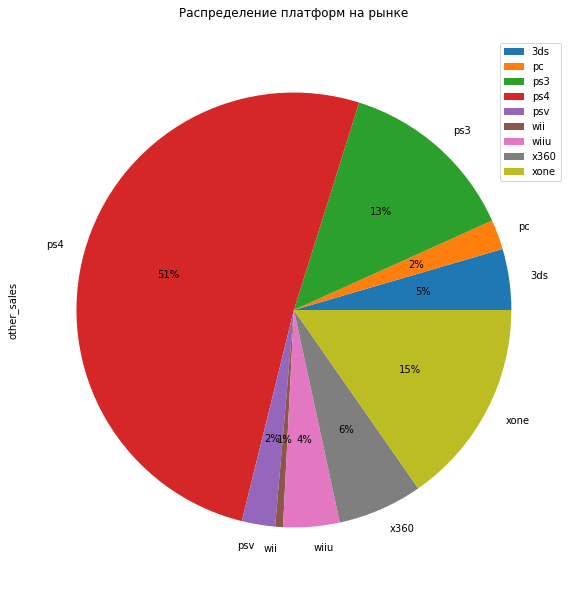

In [70]:
other_games.groupby(['platform']).sum().plot(kind='pie', y='other_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Распределение платформ на рынке'+ "\n")
None

#### Посмотрим на самые популярные жанры (Топ-5).

In [71]:
other_games.pivot_table(index=['genre'], values= ['other_sales'], aggfunc='sum').sort_values(by = 'other_sales',ascending=False).head()

,other_sales
genre,
action,19.50
shooter,16.51
sports,11.34
role-playing,7.24
misc,3.89


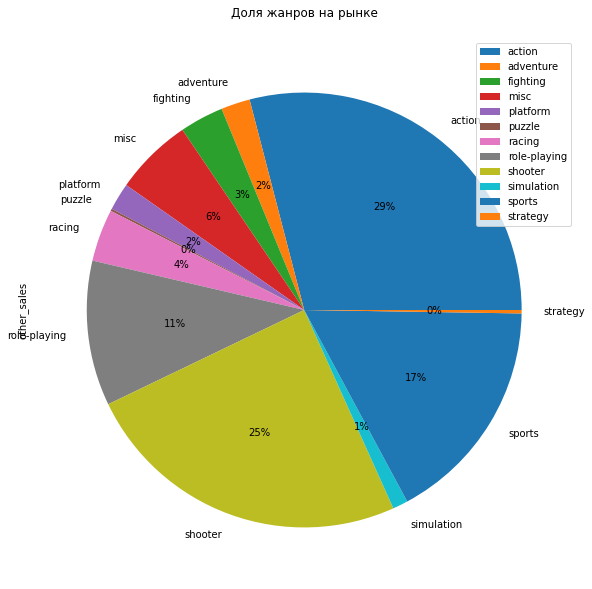

In [72]:
other_games.groupby(['genre']).sum().plot(kind='pie', y='other_sales',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Доля жанров на рынке'+ "\n")
None

Здесь в целом рынок не отличается от европейского и американского - все так же популярны PS4 и PS3, шутеры и экшен.

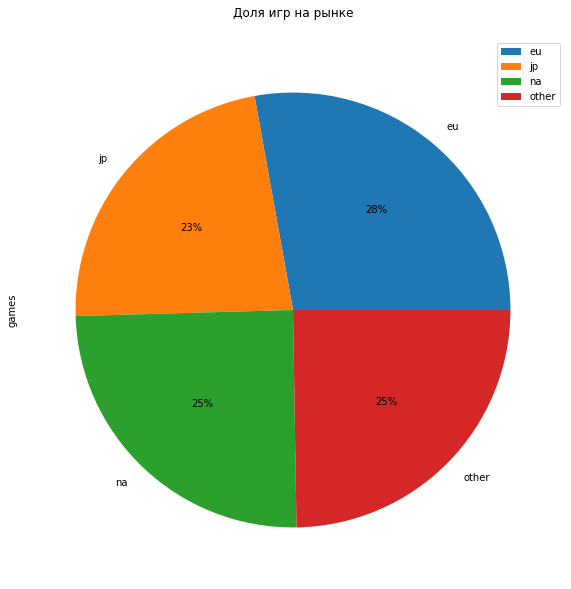

In [73]:
data = {'region': ['na', 'jp', 'eu', 'other'],'games': [na, jp, eu, ot]}
games_region= pd.DataFrame(data) 
games_region['games'] = games_region['games'].astype('int32')
games_region.groupby(['region']).sum().plot(kind='pie', y='games',autopct='%1.0f%%',figsize=(10, 10))
plt.title('Доля игр на рынке'+ "\n")
None

Мы видим, что за последние 5 лет в Европе вышло больше всего игр, на втором месте Северна Америка и другие страны, на третьем- Япония. Посмотрим отдельно по продажам.

In [74]:
games_two_years['na_sales'].sum()

239.12999999999997

In [75]:
games_two_years['eu_sales'].sum()

219.46000000000004

In [76]:
games_two_years['jp_sales'].sum()

73.78

In [77]:
games_two_years['other_sales'].sum()

67.14

Больше всего копий игр покупает Северная Америка и меньше всего - другие страны.
Посмотрим как Топ-5 распределяется по странам -  Северной Америки, Европы и Японии.

In [78]:
# группируем жанры, чтоб вычислить топ-5
top_5_p= games_two_years.pivot_table(index=['platform'],values =['na_sales', 'eu_sales', 'jp_sales', 'total_sales'],aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
# выделяем топ-5
top_5_list = top_5_p['platform'].value_counts().index[:5]
# заменяем остальные на 'other'
top_5_p.loc[~top_5_p['platform'].isin(top_5_list), 'platform'] = 'other'
#суммируем 'other'
top_5_p = top_5_p.pivot_table(index=['platform'],values =['na_sales', 'eu_sales', 'jp_sales', 'total_sales'],aggfunc='sum').reset_index()
top_5_p

,platform,eu_sales,jp_sales,na_sales,total_sales
0,3ds,13.79,36.21,18.50,71.54
1,other,31.73,17.98,27.52,83.58
2,ps3,24.28,9.92,21.38,64.58
3,ps4,98.26,9.28,77.12,218.90
4,x360,14.78,0.08,27.61,46.70
5,xone,36.62,0.31,67.00,114.21


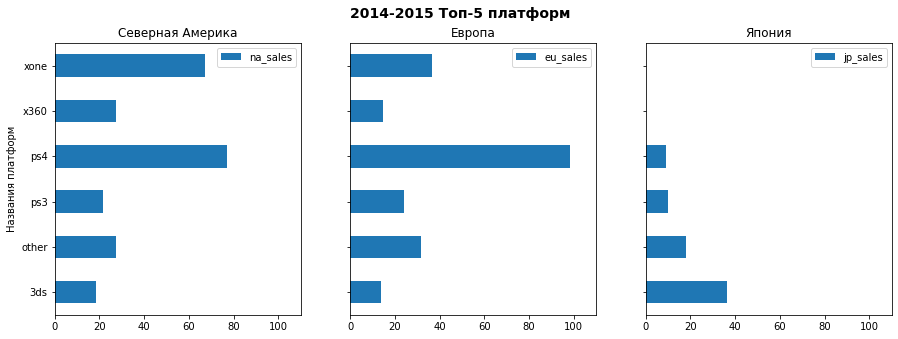

In [79]:
fig, (ax1, ax2, ax3)= plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(15, 5))

# Северная Америка
top_5_p.plot(kind='barh', y="na_sales", x="platform", ax=ax1)
ax1.set_xlim([0, 110])
ax1.set(title='Северная Америка', ylabel='Названия платформ')

# Европа
top_5_p.plot(kind='barh', y="eu_sales", x="platform", ax=ax2)
ax2.set_xlim([0, 110])
ax2.set(title='Eвропа', ylabel='Названия платформ')

# Япония
top_5_p.plot(kind='barh', y="jp_sales", x="platform", ax=ax3)
ax3.set_xlim([0, 110])
ax3.set(title='Япония', ylabel='Названия платформ')

# Заголовок 
fig.suptitle('2014-2015 Топ-5 платформ', fontsize=14, fontweight='bold');


In [80]:
# группируем жанры, чтоб вычислить топ-5
top_5_g = games_two_years.pivot_table(index=['genre'],values =['na_sales', 'eu_sales', 'jp_sales', 'total_sales'],aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
# выделяем топ-5
top_5_list = top_5_g['genre'].value_counts().index[:5]
# заменяем остальные на 'other'
top_5_g.loc[~top_5_g['genre'].isin(top_5_list), 'genre'] = 'other'
#суммируем 'other'
top_5_g = top_5_g.pivot_table(index=['genre'],values =['na_sales', 'eu_sales', 'jp_sales', 'total_sales'],aggfunc='sum').reset_index()
top_5_g

,genre,eu_sales,jp_sales,na_sales,total_sales
0,action,64.00,22.51,63.24,169.25
1,misc,12.20,4.57,14.29,34.95
2,other,36.03,16.00,32.65,93.34
3,role-playing,23.89,24.55,27.58,83.26
4,shooter,49.62,3.81,62.78,132.72
5,sports,33.72,2.34,38.59,85.99


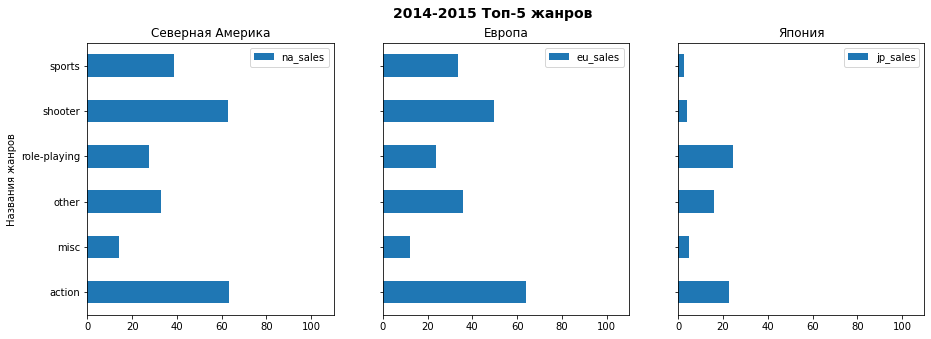

In [81]:
fig, (ax1, ax2, ax3)= plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(15, 5))

# Северная Америка
top_5_g.plot(kind='barh', y="na_sales", x="genre", ax=ax1)
ax1.set_xlim([0, 110])
ax1.set(title='Северная Америка', ylabel='Названия жанров')

# Европа
top_5_g.plot(kind='barh', y="eu_sales", x="genre", ax=ax2)
ax2.set_xlim([0, 110])
ax2.set(title='Eвропа', ylabel='Названия жанров')

# Япония
top_5_g.plot(kind='barh', y="jp_sales", x="genre", ax=ax3)
ax3.set_xlim([0, 110])
ax3.set(title='Япония', ylabel='Названия жанров')

# Заголовок 
fig.suptitle('2014-2015 Топ-5 жанров', fontsize=14, fontweight='bold');

### Изучим влияние рейтинга ESRB на продажи

Посмотрим распределение продаж по рейтингу

In [82]:
(games_two_years
 .pivot_table(index=games_two_years.rating.apply(lambda x: x if x else 'unknown'),
                     values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                     aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0)
 .style
 .format("{:.1%}")
 .background_gradient(cmap='Blues', axis=0)
)


,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,20.3%,10.7%,17.9%,18.3%
E10+,10.2%,5.4%,12.3%,10.1%
M,35.0%,9.2%,33.8%,35.3%
T,11.1%,17.0%,12.5%,12.2%
unknown,23.5%,57.7%,23.5%,24.0%


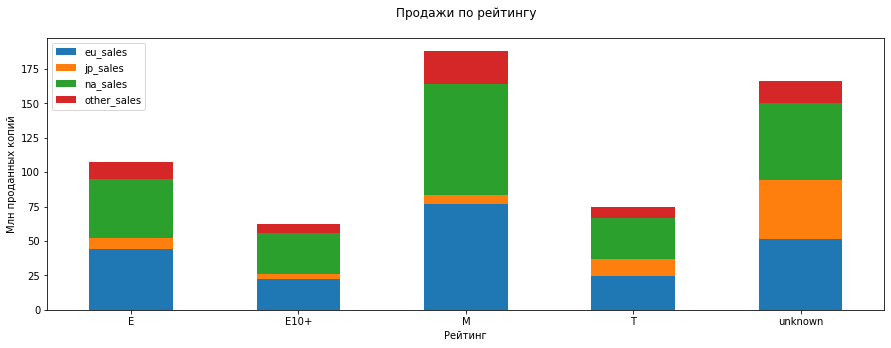

In [83]:
fig, ax = plt.subplots()
games_two_years.pivot_table(index= 'rating',values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc='sum').plot(kind='bar',
       stacked=True, figsize=(15, 5), rot = 0,
       ax=ax)
plt.title('Продажи по рейтингу'+ "\n")
plt.xlabel('Рейтинг')
plt.ylabel('Млн проданных копий');

Больше всего оцененных игр с рейтингом М.

В Японии больше 57% игр не оценено, возможно на их игры в принципе не действует рейтинг ESRB, у них действует свой внутренний рейтинг. Как мы помними, у них большинство продаж  - на их национадльной платформе Nintendo  с их играми.
В Европе и Северной Америке значения схожи. Посмотрим распределение рейтинга по жанрам.

In [84]:
genre_rating = (games_two_years
                .pivot_table(index='genre',
                             columns=games_two_years.rating.apply(lambda x: x if x else 'unknown'),
                             values=['total_sales'],
                             aggfunc=lambda x: x.sum())
                .apply(lambda col: col / col.sum(), axis=1)
               )

(genre_rating[[('total_sales', 'E'),
              ('total_sales', 'E10+'),
              ('total_sales', 'T'),
             ('total_sales', 'M'),
             ('total_sales', 'unknown')]]
 .style
 .format("{:.1%}")
 .background_gradient(cmap='Blues', axis=1)
)

По таблице не видно значимого влияния рейтинга на продажи. Проверим различаются ли продажи игр одного жанра с разными рейтингами, например 13+ и 17+. Возьмем 3 жанра с примерно равными долями рейтингов и проверим статистическую значимость различий.

In [85]:
# сравним продажи медианной игры жанра с рейтингом М и Т
genre = ['action', 'fighting', 'role-playing']
rating = ['T', 'M']
(games_two_years.query('genre in @genre and rating in @rating')
 .pivot_table(index='genre',
              columns='rating',
              values='total_sales',
              aggfunc=['count', 'mean'])
 .style
 .format("{:.2f}")
 .background_gradient(cmap='Blues', axis=1, subset=['mean'])
)

In [86]:
# проверим статистическую значимость различий
for gen in genre:
    genre_t = games_two_years.query('genre == @gen and rating == "T"').total_sales
    genre_m = games_two_years.query('genre == @gen and rating == "M"').total_sales
    pvalue = st.ttest_ind(genre_t, genre_m).pvalue
    print(f'{gen}: разница {"не значима" if pvalue > 0.01 else "значима"}. Pvalue: {pvalue:.5f}')

action: разница значима. Pvalue: 0.00272
fighting: разница значима. Pvalue: 0.00037
role-playing: разница не значима. Pvalue: 0.03568


Разница не значима только у ролевой игры. Вероятно, рейтинг влияет напродажи в Северной Америке и Европе. Точно могу сказать, в Японии этот рейтинг не влияет на продажи, так как там у половины игр вообще нет никакого рейтинга и в топе -именно японские игры без рейтинга.

## Шаг 5. Проверьте гипотезы

### Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [87]:
rating_x_one = games_two_years.query('platform=="xone"& user_score !=0')
rating_x_one['user_score'].mean()

6.591919191919192

In [88]:
rating_pc = games_two_years.query('platform=="pc"& user_score !=0')
rating_pc['user_score'].mean()

6.298701298701301

In [89]:
rating_x_one = rating_x_one['user_score']
rating_pc = rating_pc['user_score']
alpha = .01
results = st.ttest_ind(rating_x_one, rating_pc, equal_var = False)
print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2064150169331124
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средний рейтинг платформ Xbox One и PC и неодинаков, с вероятностью в почти 20% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами Xbox One и PC.

In [90]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги  жанров Action и Sports равны

H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [91]:
rating_action = games_two_years.query('genre=="action"& user_score!=0')
rating_action['user_score'].mean()

6.809433962264145

In [92]:
rating_sports = games_two_years.query('genre=="sports" & user_score!=0')
rating_sports['user_score'].mean()

5.140000000000001

In [93]:
rating_action = rating_action['user_score']
rating_sports = rating_sports['user_score']
alpha = .05
results = st.ttest_ind(rating_action, rating_sports, equal_var = False)
print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.639159825656921e-13
Отвергаем нулевую гипотезу


Мы можем отвергнуть нулевую гипотезу.

## Шаг 6. Вывод

После 2008 количество выпускаемых игр стало падать. Это связано с кризисом, случившимся в 2008 и затронувшим всю игровую индустрию. Распределение релиза и продаж игр по регионам в целом равнозначно.

Основные платформы - playstation, xbox, nintendo, pc. Есть различия в поколениях и том - портативная приставка или нет. Средний цикл жизни платформы- 10 лет. Почти у всех платформ есть игры- бестселлеры, продажи которых могут многократно превышать обычные значения и есть игры с относительно небольшими продажами.

Топ-5 жанров - экшен, шутеры, ролевые иигры, спортивные и игры смешанных жанров.
Выделяются жанры с самыми плохими продажами - хуже всего продаются паззлы и стратегии(возможно потому, что на рынке представлено огромное количество игр в этом жанре бесплатно).

Топ-5 платформ: PS4, PS3, X360, 3DS, XOne. Их них - PS4 и Xone относительно новые для рынка, их пик популярности пришелся на 2015 год. Интересно, что 3DS-это портативная платформа, в отличае от всех остальных.

Между оценками эзеров и критиков и продажами практически нет зависимости. Возможно это связано с тем, что все сначала покупают игру после выхода, а потом уже появляются оценки на нее.

За последние 2 года в разных регионах вышло приблизительно одинаковое количество игр, при этом есть разница в продаже копий.
Больше всего копий игр покупает Северная Америка и меньше всего - Япония.

### Результаты на 2014-2015 годы

**Северная Америка**
Топ-5 платформ: X360, PS4, PS3,  XOne, 3DS
Не отличается от Топа-5 по всей базе.
В отличие от общего топа, здесь на первом месте - X360, а на последнем портативная 3DS. В целом в топе все те же игры. Производитель Х360 - американская компания Microsoft, вероятно с этим связана популярность Х360 именно в Северной Америке.
Топ-5 жанров: Action, Shooter,Sports,Role-Playing,Misc

**Европа**
Топ-5 платформ: PS4,  PS3, X360, XOne, 3DS.
Тут на первом месте PS4, как в общей базe, на последнем месте 3DS как в Северной Америке, а в самом топе все те же платформы.
Топ-5 жанров: Action, Shooter,Sports,Role-Playing,Racing
В топе жанров здесь на местр игр смешанных жанров в топ попали гонки.Акшен и шутер по-прежнему занимают первые места.


**Япония**
Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU.
Топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting
Япония всегда отличается от остального рынка. Мы видим здесь совершенно иную картину - с огромным отрывом в 50% лидирующая платформа здесь - портативная 3DS. Кроме того, в топ попали портативные PSV(playstation) и WiiU(Nintendo). Это можно объяснить любовью японцев к мобильным играм к своему национальному продукту- Nintendo. Жанры игр здесь отличаются, так как в топе - игры более подходящие для портативных приставок - ролевые вышли на первое место, сместив экшен на второе, в топе появились симуляторы и платформеры.

**Другие страны**
Топ-5 платформ: PS4,  PS3, X360, XOne, 3DS.
Топ-5 жанров: Action, Shooter,Sports,Role-Playing,Misc
От Европы отличается только тем, что в топ вместо гонов попали игры смешанных жанров.

### Рекомендации на 2017
Платформы, набирающие обороты к 2017 году - ps4 и xone

Мы проверили гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Ее не получилось отвергуть.

Проверили гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.Ее не получилось отвергуть.
 
Если мы захотим выпустить какую то игру в 2017, нужно ориентироваться на рынок Южной Америки, Европы и других стран( в порядке убывания). Игра должна быть на PS4 в жанре экшен.